# ANNEX B
# WORLD WIDE COVID 19 CASES PREDICTION
## SUBMITTED BY: FAISAL JAVED
### MACHINE LEARNING PROJECT (MS RIME 2020)

In [1]:
import numpy as np 
import pandas as pd

## DATA SET DETAILS 
### GATHERING & CLEANING

In [2]:
#Importing covid data excell file using pandas
Data = pd.read_excel("Country wise Covid Data.xlsx")

In [3]:
#printing data
Data

,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,Asia,Afghanistan,2020-01-23,0,0,0,54.422,0.498,7.0,0
1,Asia,Afghanistan,2020-01-24,1,1,0,54.422,0.498,7.0,0
2,Asia,Afghanistan,2020-01-25,2,2,0,54.422,0.498,13.0,0
3,Asia,Afghanistan,2020-01-26,3,3,0,54.422,0.498,2.0,0
4,Asia,Afghanistan,2020-01-27,4,4,0,54.422,0.498,6.0,0
...,...,...,...,...,...,...,...,...,...,...
54715,Africa,Zimbabwe,2020-12-03,54715,315,170,42.729,0.535,31.0,295
54716,Africa,Zimbabwe,2020-12-04,54716,316,170,42.729,0.535,26.0,123
54717,Africa,Zimbabwe,2020-12-05,54717,317,170,42.729,0.535,21.0,70
54718,Africa,Zimbabwe,2020-12-06,54718,318,170,42.729,0.535,22.0,101


In [4]:
#Add a column of ones for the bias term. I chose 1 because if you multiply one with any value, that value does not change.
Data = pd.concat([pd.Series(1,index=Data.index,name = '00'),Data],axis = 1)
Data.head()

,00,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,1,Asia,Afghanistan,2020-01-23,0,0,0,54.422,0.498,7.0,0
1,1,Asia,Afghanistan,2020-01-24,1,1,0,54.422,0.498,7.0,0
2,1,Asia,Afghanistan,2020-01-25,2,2,0,54.422,0.498,13.0,0
3,1,Asia,Afghanistan,2020-01-26,3,3,0,54.422,0.498,2.0,0
4,1,Asia,Afghanistan,2020-01-27,4,4,0,54.422,0.498,6.0,0


In [5]:
#Checking Data Types
Data.dtypes

00                                  int64
CONTINENT                          object
LOCATION                           object
DATE                       datetime64[ns]
COUNTRY_SERIES                      int64
DATE_CODE                           int64
COUNTRY_CODE                        int64
POPULATION DENSITY                float64
HUMAN_DEVELOPMENT_INDEX           float64
TEMPERATURES                      float64
CASES                               int64
dtype: object

In [6]:
Data = Data.sample(frac=1) #Rearranging DataSet to contain random entries 
Data

,00,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
26058,1,Asia,Japan,2020-06-09,26058,138,81,347.778,0.909,28.0,51
51141,1,Asia,Turkey,2020-10-10,51141,261,159,104.914,0.791,22.0,1649
33948,1,Europe,Monaco,2020-02-20,33948,28,106,19347.500,0.500,15.0,0
43031,1,Africa,Senegal,2020-06-22,43031,151,134,82.328,0.505,30.0,82
42371,1,Europe,San Marino,2020-06-02,42371,131,132,556.667,0.500,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...
24572,1,Asia,Iraq,2020-10-01,24572,252,76,88.125,0.685,34.0,4493
45925,1,Asia,South Korea,2020-07-06,45925,165,143,527.967,0.903,26.0,44
14624,1,Europe,Denmark,2020-09-03,14624,224,45,136.520,0.929,20.0,180
30610,1,Europe,Luxembourg,2020-08-20,30610,210,95,231.447,0.904,32.0,71


In [7]:
#Assigning our x parameters from data set by dropping extra coloumns
X = Data.drop(['LOCATION','CONTINENT','DATE','COUNTRY_SERIES','CASES',],1)

### Defining New Features

In [8]:
X['HDI']=X['HUMAN_DEVELOPMENT_INDEX']*X['POPULATION DENSITY']
X['Temperature_sq'] = X['TEMPERATURES']**2
X['Population_Density_sq'] = X['POPULATION DENSITY']**2

In [9]:
X.dtypes

00                           int64
DATE_CODE                    int64
COUNTRY_CODE                 int64
POPULATION DENSITY         float64
HUMAN_DEVELOPMENT_INDEX    float64
TEMPERATURES               float64
HDI                        float64
Temperature_sq             float64
Population_Density_sq      float64
dtype: object

In [10]:
#Head function gives top 5 entries of complete data set
X.head()

,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
26058,1,138,81,347.778,0.909,28.0,316.130202,784.0,1.209495e+05
51141,1,261,159,104.914,0.791,22.0,82.986974,484.0,1.100695e+04
33948,1,28,106,19347.500,0.500,15.0,9673.750000,225.0,3.743258e+08
43031,1,151,134,82.328,0.505,30.0,41.575640,900.0,6.777900e+03
42371,1,131,132,556.667,0.500,25.0,278.333500,625.0,3.098781e+05


In [11]:
#Tail fun gives last 5 entries of complete data set
X.tail()

,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
24572,1,252,76,88.125,0.685,34.0,60.365625,1156.0,7766.015625
45925,1,165,143,527.967,0.903,26.0,476.754201,676.0,278749.153089
14624,1,224,45,136.520,0.929,20.0,126.827080,400.0,18637.710400
30610,1,210,95,231.447,0.904,32.0,209.228088,1024.0,53567.713809
33715,1,115,105,123.655,0.700,19.0,86.558500,361.0,15290.559025


In [12]:
# defining cases as our output variable in our data set
Y = Data['CASES']
Y.head() # checking head of our y parameter

26058      51
51141    1649
33948       0
43031      82
42371       1
Name: CASES, dtype: int64

In [13]:
Y.dtypes

dtype('int64')

### SCALING OF DATA

In [14]:
#np.spacing(0) to avoid division 0/0.
x = X / (X.max(axis=0) + np.spacing(0))
x.head()


,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
26058,1.0,0.432602,0.476471,0.017975,0.953830,0.538462,0.032679,0.289941,0.000323
51141,1.0,0.818182,0.935294,0.005423,0.830010,0.423077,0.008579,0.178994,0.000029
33948,1.0,0.087774,0.623529,1.000000,0.524659,0.288462,1.000000,0.083210,1.000000
43031,1.0,0.473354,0.788235,0.004255,0.529906,0.576923,0.004298,0.332840,0.000018
42371,1.0,0.410658,0.776471,0.028772,0.524659,0.480769,0.028772,0.231139,0.000828


### SPLITTING OF DATA SET INTO TRAIN,TEST & VALID DATA

In [15]:
data_train = round(0.6*len(Data))
data_valid = round(data_train+0.2*len(Data))

In [16]:
train_x = x[:data_train]
valid_x = x[data_train:data_valid]
test_x = x[data_valid:]

In [17]:
train_y = Y[:data_train]
valid_y = Y[data_train:data_valid]
test_y = Y[data_valid:]

In [18]:
train_x

,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
26058,1.0,0.432602,0.476471,0.017975,0.953830,0.538462,0.032679,0.289941,0.000323
51141,1.0,0.818182,0.935294,0.005423,0.830010,0.423077,0.008579,0.178994,0.000029
33948,1.0,0.087774,0.623529,1.000000,0.524659,0.288462,1.000000,0.083210,1.000000
43031,1.0,0.473354,0.788235,0.004255,0.529906,0.576923,0.004298,0.332840,0.000018
42371,1.0,0.410658,0.776471,0.028772,0.524659,0.480769,0.028772,0.231139,0.000828
...,...,...,...,...,...,...,...,...,...
49163,1.0,0.636364,0.900000,0.003344,0.564533,0.519231,0.003598,0.269601,0.000011
53434,1.0,0.984326,0.976471,0.001215,0.524659,0.269231,0.001215,0.072485,0.000001
49162,1.0,0.633229,0.900000,0.003344,0.564533,0.500000,0.003598,0.250000,0.000011
22836,1.0,0.363636,0.417647,0.005584,0.879328,0.480769,0.009359,0.231139,0.000031


In [19]:
valid_x

,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
17755,1.0,0.485893,0.323529,0.005425,0.485834,0.865385,0.005023,0.748891,2.942884e-05
41735,1.0,0.423197,0.764706,0.015154,0.783841,0.596154,0.022640,0.355399,2.296359e-04
42862,1.0,0.946708,0.782353,0.000792,0.895068,0.538462,0.001351,0.289941,6.271641e-07
29073,1.0,0.855799,0.529412,0.030731,0.794334,0.557692,0.046526,0.311021,9.443721e-04
23283,1.0,0.761755,0.423529,0.000176,0.981112,0.134615,0.000329,0.018121,3.095490e-08
...,...,...,...,...,...,...,...,...,...
8032,1.0,0.100313,0.147059,0.003369,0.853095,0.211538,0.005478,0.044749,1.134956e-05
19937,1.0,0.304075,0.364706,0.012250,0.982162,0.326923,0.022933,0.106879,1.500741e-04
5918,1.0,0.495298,0.105882,0.005123,0.540399,0.692308,0.005276,0.479290,2.624129e-05
4773,1.0,0.918495,0.082353,0.034344,0.839454,0.596154,0.054950,0.355399,1.179484e-03


In [20]:
test_x

,00,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,HDI,Temperature_sq,Population_Density_sq
53182,1.0,0.194357,0.976471,0.001215,0.524659,0.250000,0.001215,0.062500,0.000001
18738,1.0,0.557994,0.341176,0.006336,0.945435,0.596154,0.011417,0.355399,0.000040
31703,1.0,0.072100,0.582353,0.075174,0.752361,0.615385,0.107800,0.378698,0.005651
37191,1.0,0.222571,0.682353,0.010833,0.558237,0.826923,0.011526,0.683802,0.000117
31906,1.0,0.708464,0.582353,0.075174,0.752361,0.576923,0.107800,0.332840,0.005651
...,...,...,...,...,...,...,...,...,...
24572,1.0,0.789969,0.447059,0.004555,0.718783,0.653846,0.006240,0.427515,0.000021
45925,1.0,0.517241,0.841176,0.027289,0.947534,0.500000,0.049283,0.250000,0.000745
14624,1.0,0.702194,0.264706,0.007056,0.974816,0.384615,0.013110,0.147929,0.000050
30610,1.0,0.658307,0.558824,0.011963,0.948583,0.615385,0.021628,0.378698,0.000143


In [21]:
train_y

26058      51
51141    1649
33948       0
43031      82
42371       1
         ... 
49163       0
53434       0
49162       0
22836      26
34103       2
Name: CASES, Length: 32832, dtype: int64

In [22]:
valid_y

17755     250
41735       0
42862     286
29073    1450
23283      42
         ... 
8032        0
19937    1627
5918       38
4773        6
36859       1
Name: CASES, Length: 10944, dtype: int64

In [23]:
test_y

53182       0
18738       0
31703       0
37191      26
31906     125
         ... 
24572    4493
45925      44
14624     180
30610      71
33715     126
Name: CASES, Length: 10944, dtype: int64

### MATHEMATICAL MODEL:

In [24]:
theeta = np.array([0]*len(train_x.columns))

In [25]:
theeta

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
def hypothesis (theeta,train_x):    #Defining Hypothesis function
    h = theeta*train_x
    return h

In [27]:
def Cost_function (train_x,train_y,theeta,lamda):    # Cost function with regularisation.
    y_1 = hypothesis(theeta,train_x)
    y_1 = np.sum(y_1,axis=1)
    var2 = (lamda/(2*len(train_x)))*np.sum((theeta[1:]**2))    # var2 uses new variable lamda to regularise theeta.
    var1 = np.sum((y_1-train_y)**2)/(2*len(train_x))
    cost = var1 + var2
    return cost    
 
# Reference Slide 09, Lecture 05    

In [28]:
def Gradient_Descent(train_x, train_y, theeta, alpha, i,lamda):
    J = []
    J_cv = []
    for iterator in range (0,i):        
        y_1 = hypothesis(theeta, train_x)
        y_1 = np.sum(y_1, axis=1)

#Gradient descent algorithm to find values of theeta (theeta(0)...theeta(6)). Regularisation term is added for all value
# of theetas except theeta(0)..... reference Slide 12, lecture 05

        for  c in range(0, len(train_x.columns)):
            if c == 0:
                theeta[c] = theeta[c] - alpha*(sum((y_1-train_y)*train_x.iloc[:,c])/len(train_x))
            else:
                theeta[c] = (theeta[c]*(1-(alpha*(lamda/len(train_x))))) - alpha*(sum((y_1-train_y)*train_x.iloc[:,c])/len(train_x))
        j = Cost_function(train_x, train_y, theeta,lamda)
        J.append(j)   #Storing value of J for each theeta
        j_cv = Cost_function(valid_x, valid_y, theeta,lamda)
        J_cv.append(j_cv)
    return J, j, theeta, J_cv,j_cv

### OUTPUT OF THE MODEL

In [29]:
J, j, theeta,J_cv,j_cv= Gradient_Descent(train_x,train_y,theeta,0.01,2000,1000)

In [30]:
theeta 

array([   0, 1509,  263,    0,  538, -102,    0,    0,    0])

### PREDICTION OF CASES ON TEST DATA

In [31]:

y_1 = hypothesis(theeta, test_x)
y_1 = np.sum(y_1, axis=1)
y_1

53182     806.863558
18738    1379.578540
31703     603.959165
37191     731.303188
31906    1568.154969
            ...     
24572    1629.652000
45925    1460.520000
14624    1614.449370
30610    1587.924818
33715    1064.341948
Length: 10944, dtype: float64

### ERROR ON TEST DATA SET

In [32]:
def RMSE(y_1, test_y):
    return np.sqrt((y_1 - test_y) ** 2).mean()
rmse_val = RMSE(np.array(y_1), np.array(test_y))
print(f" Root Mean Square Error is:  {rmse_val}")

 Root Mean Square Error is:  1832.7631256766722


In [33]:
def MSE(y_1, test_y):
    return (1/2*len(test_x))*np.sum((y_1 - test_y) ** 2)
    #return np.sum((y_1 - test_y) ** 2).mean()
mse_val = MSE(np.array(y_1), np.array(test_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  2289129272281231.5


### PLOTTING ACTUAL vs PREDICTED CASES

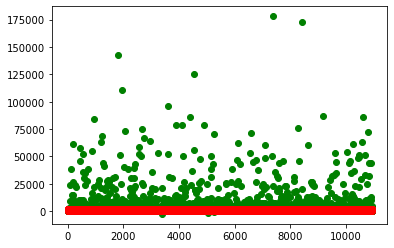

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(test_x))),y= test_y, color='green')         
plt.scatter(x=list(range(0, len(test_x))), y=y_1, color='red')
plt.show()

### TESTING ON VALID DATA SET

In [35]:
###VALID DATA
y_2 = hypothesis(theeta, valid_x)
y_2 = np.sum(y_2, axis=1)
y_2

17755     991.410974
41735    1200.621161
42862    2060.965513
29073    1801.103454
23283    1774.984899
            ...     
8032      627.437961
19937    1049.823961
5918      995.370585
4773     1798.486978
36859     574.465894
Length: 10944, dtype: float64

In [36]:
### ERROR ON VALID DATA
def RMSE(y_2, valid_y):
    return np.sqrt((y_2 - valid_y) ** 2).mean()
rmse_val = RMSE(np.array(y_2), np.array(valid_y))
print(f" Root Mean Square Error is:  {rmse_val}")

 Root Mean Square Error is:  1890.41471898166


In [37]:
def MSE(y_2, valid_y):
    return (1/len(valid_x))*np.sum((y_2 - valid_y) ** 2)
mse_val = MSE(np.array(y_2), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  50753499.85023239


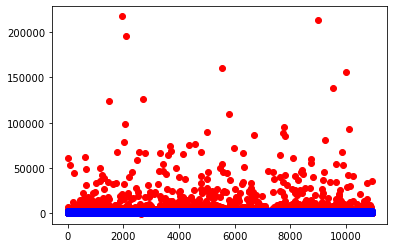

In [38]:
### PLOTTING VALID DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(valid_x))),y= valid_y, color='red')         
plt.scatter(x=list(range(0, len(valid_x))), y=y_2, color='blue')
plt.show()

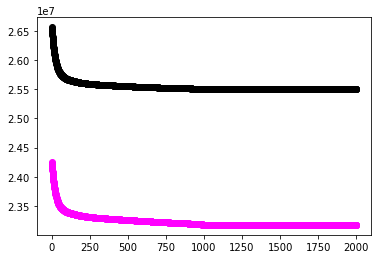

In [39]:
plt.figure()
plt.scatter(x=list(range(0, 2000)), y=J, color ='magenta')
plt.scatter(x=list(range(0, 2000)), y=J_cv, color ='black')
plt.show()